![Alt text](download.png)


In [1]:
# Get the required dependencies
! pip install bubbly -q
#! pip install iplot ##iplot installed ahead from the plotly package
! pip install chart_studio -q

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot

In [3]:
df = pd.read_csv('happiness_report.csv')

In [4]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
df[df['Country or region'] == "Iran"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
116,117,Iran,4.548,1.1,0.842,0.785,0.305,0.27,0.125


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [8]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
maxi = df['Score'].max()  
df[df['Score'] == maxi]   


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393


<Figure size 2000x2000 with 0 Axes>

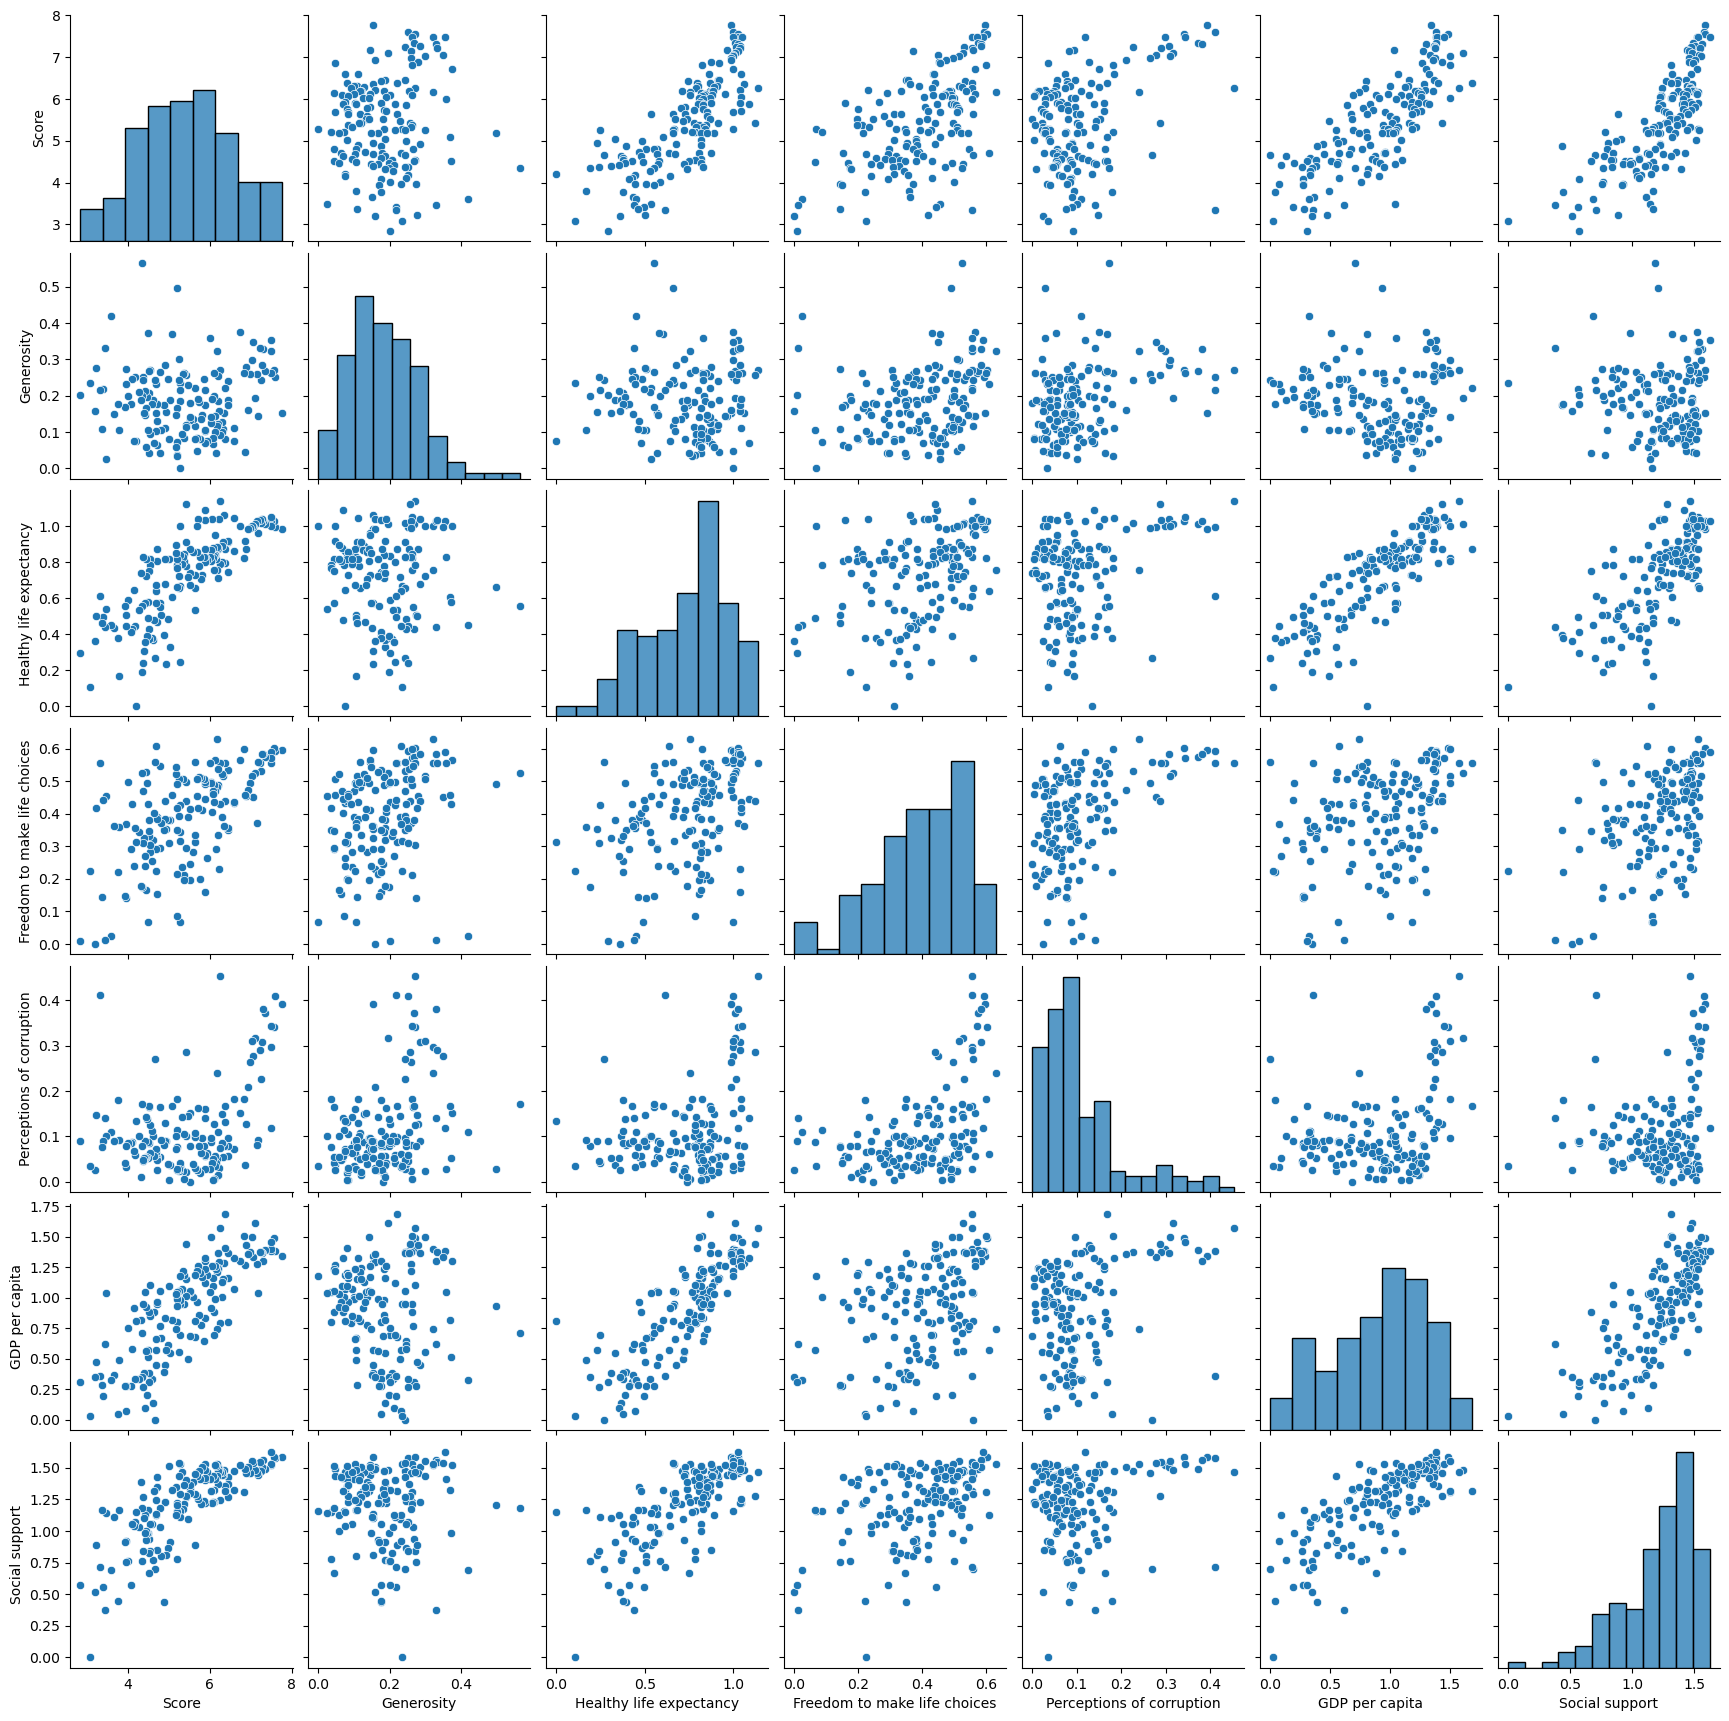

In [13]:
fig  = plt.figure(figsize=(20,20))
sns.pairplot(df[['Score','Generosity','Healthy life expectancy', "Freedom to make life choices",'Perceptions of corruption','GDP per capita','Social support']])
plt.show();

The scatterplot matrix in the image shows pairwise relationships between several features and the overall "Score" (likely a happiness or well-being index). Here's an analysis of the relationships between the features and the "Score":

### Key Observations:
1. **Social Support vs. Score**:
   - There is a strong positive correlation between "Social Support" and "Score." Countries with higher social support tend to have higher scores, as seen from the upward trend in their scatterplot.

2. **GDP per Capita vs. Score**:
   - A clear positive relationship exists between "GDP per Capita" and "Score." Higher economic output per capita is associated with higher scores, indicating that wealthier nations generally report higher well-being.

3. **Healthy Life Expectancy vs. Score**:
   - This feature also shows a positive correlation with "Score." Countries with longer healthy life expectancies tend to have higher scores, reflecting the importance of health in overall well-being.

4. **Freedom to Make Life Choices vs. Score**:
   - There is a moderate positive relationship here. Countries where people feel freer to make life choices tend to have higher scores.

5. **Generosity vs. Score**:
   - The relationship between "Generosity" and "Score" appears weaker compared to other features, though there is still a slight positive trend.

6. **Perceptions of Corruption vs. Score**:
   - This feature shows a negative relationship with the score. Countries with lower perceptions of corruption (higher trust in institutions) tend to have higher scores.

### General Insights:
- Features like "Social Support," "GDP per Capita," and "Healthy Life Expectancy" show the strongest correlations with the score, suggesting they are key drivers of well-being.
- Features like "Generosity" and "Perceptions of Corruption" have weaker relationships but still contribute meaningfully.
- The scatterplots' density and trends provide visual evidence for these relationships, helping identify which factors most influence the overall score.



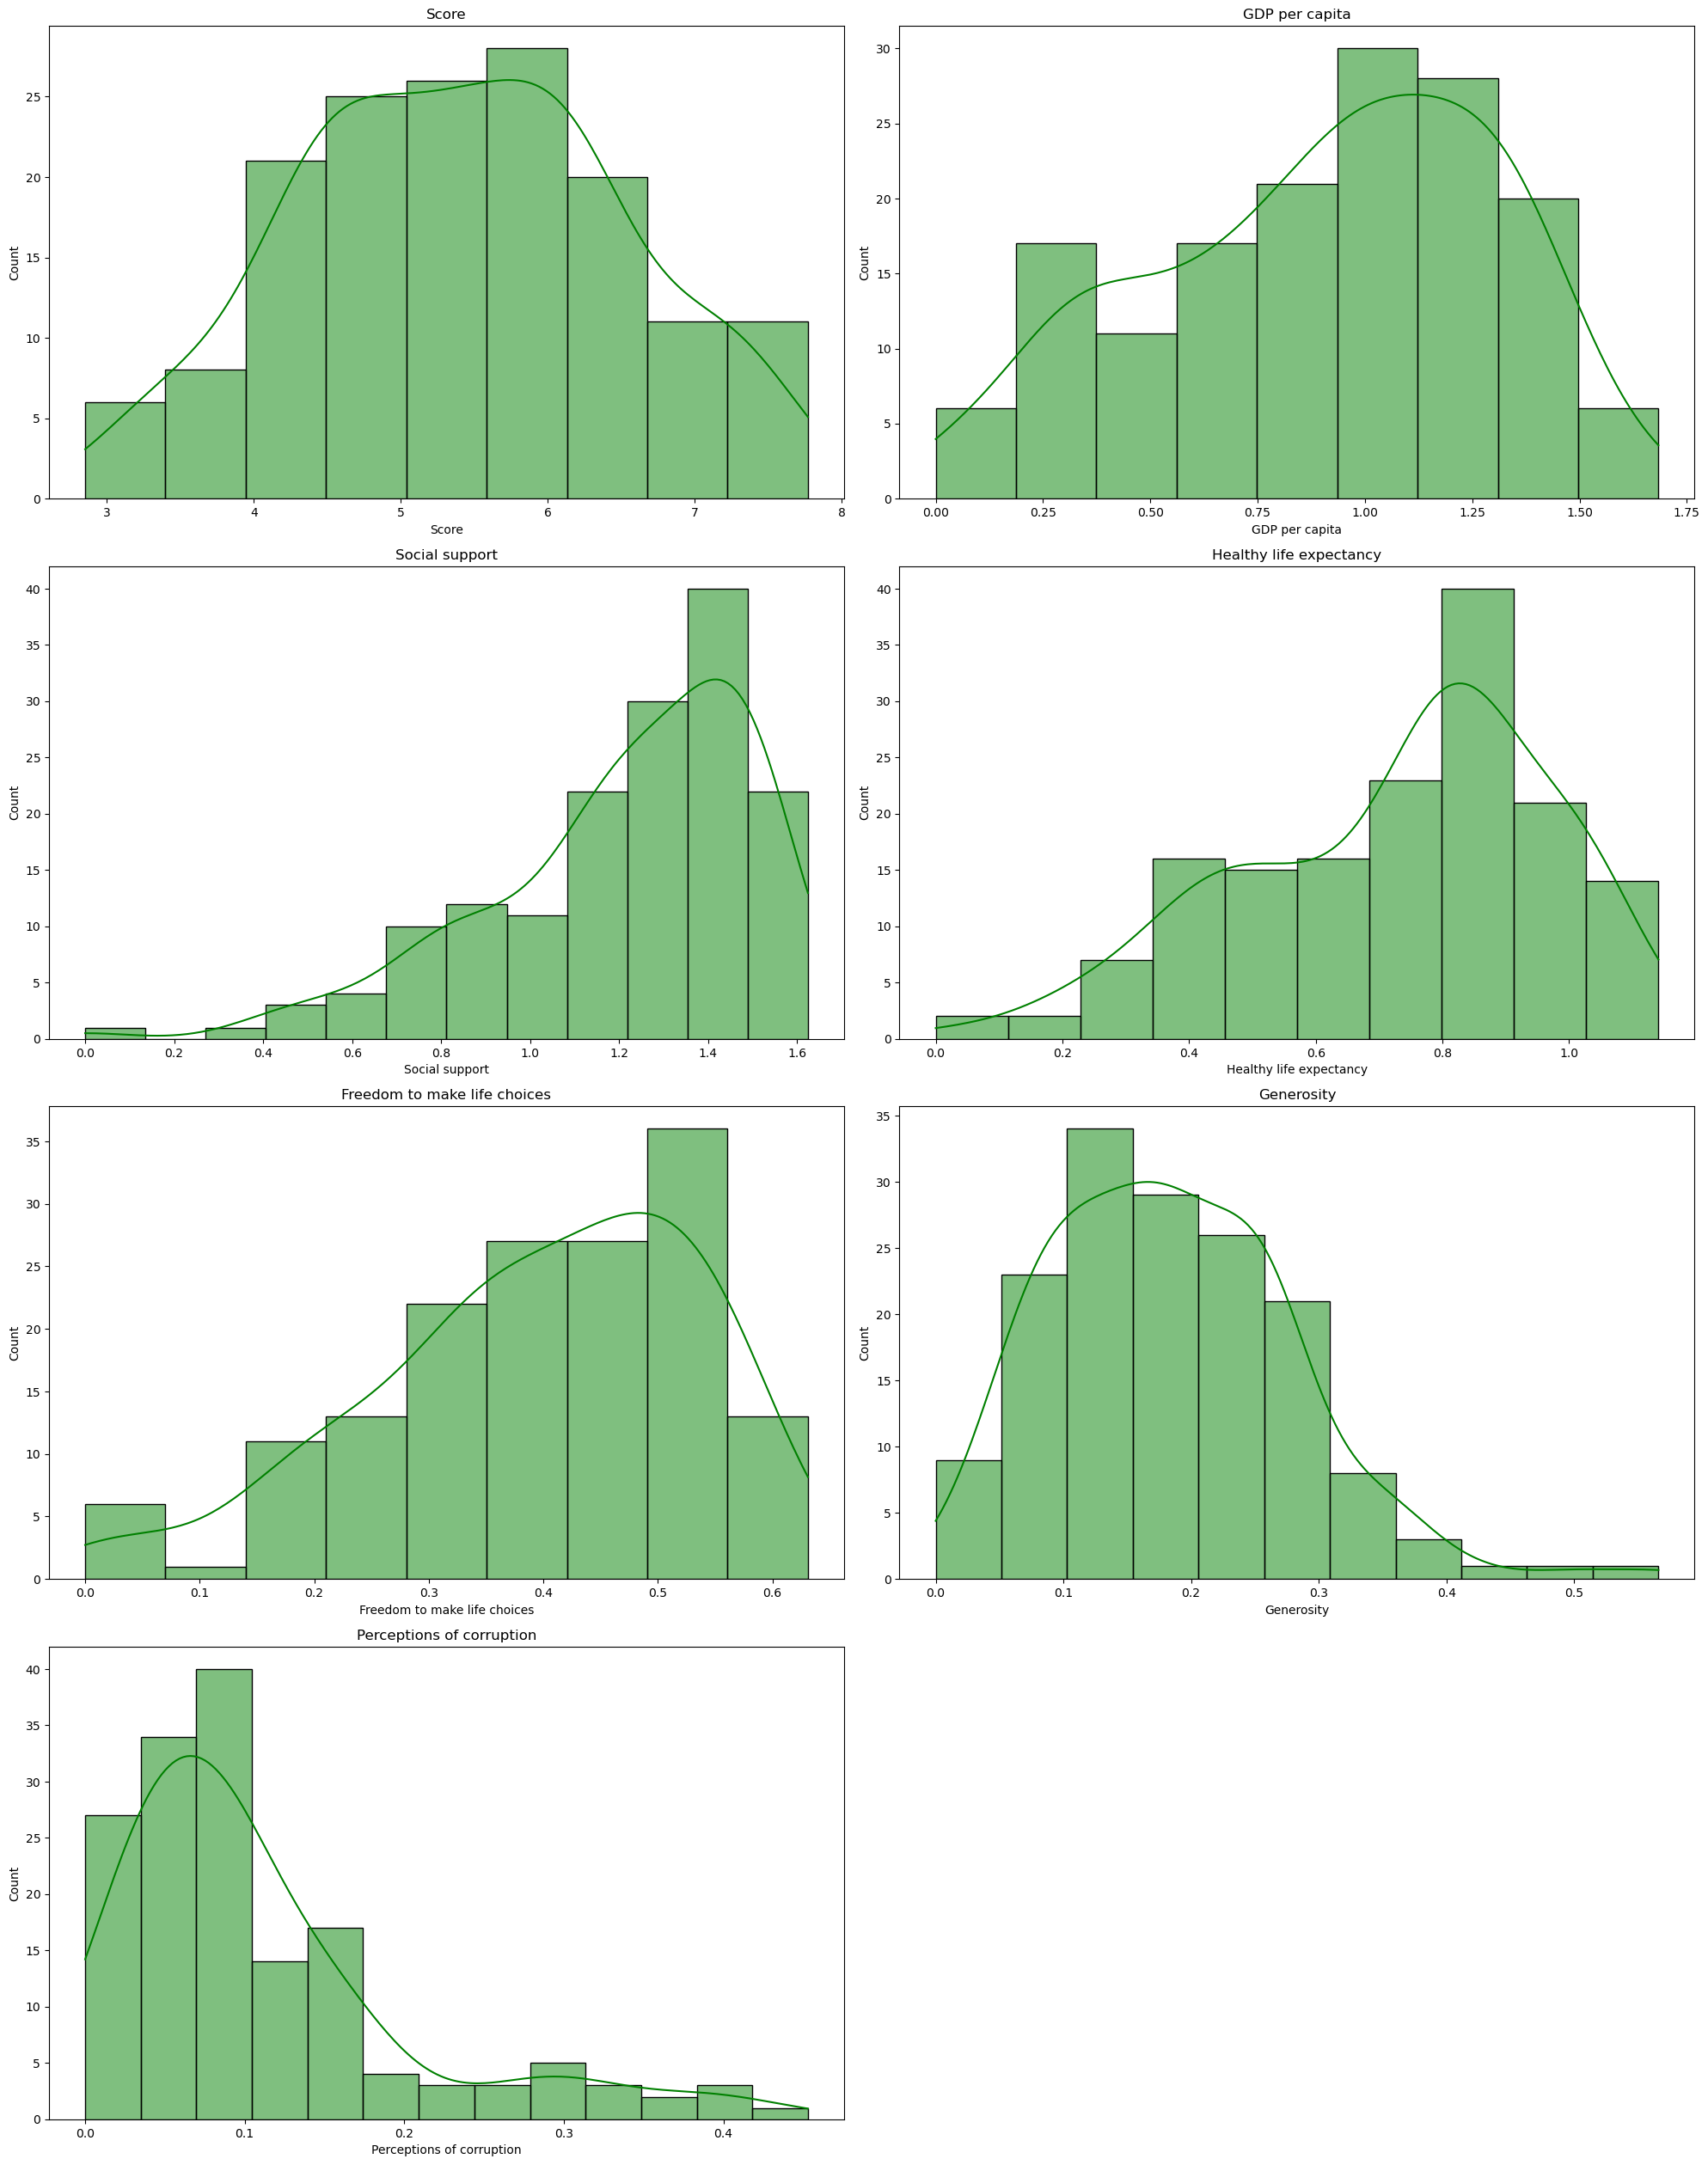

In [26]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(20, 50))
for i in range(len(columns)):
    plt.subplot(8, 2, i+1)
    sns.histplot(df[columns[i]], color='g', kde=True)
    plt.title(columns[i])

plt.tight_layout()


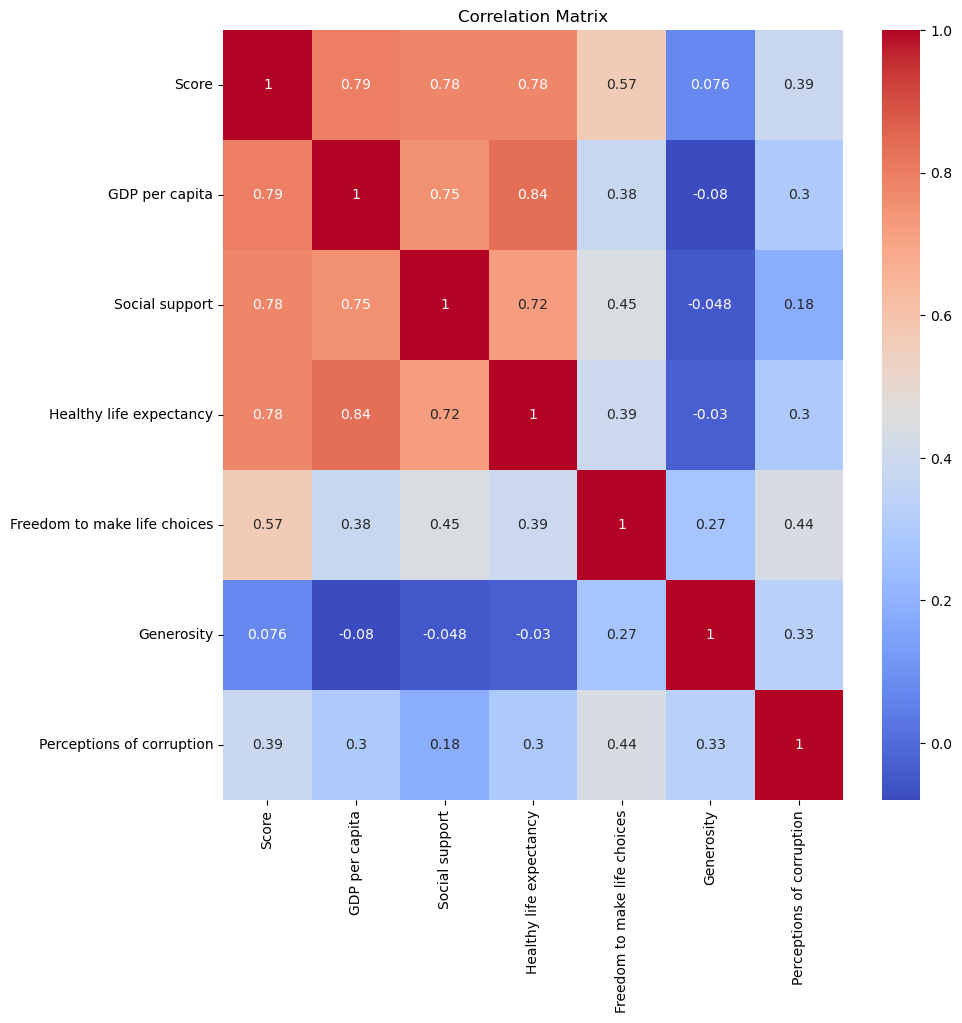

In [35]:
columns = ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

plt.figure(figsize=(10, 10))
corr = df[columns].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.title('Correlation Matrix')

plt.show();